# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Decision Tree**

Abhiram Jyosyula





In **Part 4**, we will be building a regression model of PARP-1 inhibitors using the decision tree algorithm.

---

## **1. Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **2. Load the data set**

In [4]:
df = pd.read_csv('PARP1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***PARP-1*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3229           1           1           1           1           0           0   
3230           1           1           1           0           0           0   
3231           1           1           1           0           0           0   
3232           1           1           1           0           0           0   
3233           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
3229           0           0           0           1  ...             0   
3230           0           0           0           1  ...             0   
3231           0           0           0           1  ...             0   
3232           0           0           0           1  ...             0   
3233           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
3229             0             0             0             0             0   
3230             0             0             0             0             0   
3231             0             0             0             0             0   
3232             0             0             0             0             0   
3233             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
3229             0             0             0             0  
3230             0             0             0             0  
3231             0             0             0             0  
3232             0             0             0             0  
3233             0             0             0             0  

[3234 rows x 881 columns]

### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

0       5.301030
1       7.698970
2       5.522879
3       7.522879
4       7.455932
          ...   
3229    8.337242
3230    6.705534
3231    8.096910
3232    9.096910
3233    7.876148
Name: pIC50, Length: 3234, dtype: float64

### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(3234, 881)

In [8]:
Y.shape

(3234,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(3234, 128)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((2587, 128), (2587,))

In [13]:
X_test.shape, Y_test.shape

((647, 128), (647,))

## **5. Building a Regression Model using Random Forest**

In [14]:
import numpy as np
np.random.seed(100)
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
print(r2)

0.3532238069277277


In [15]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

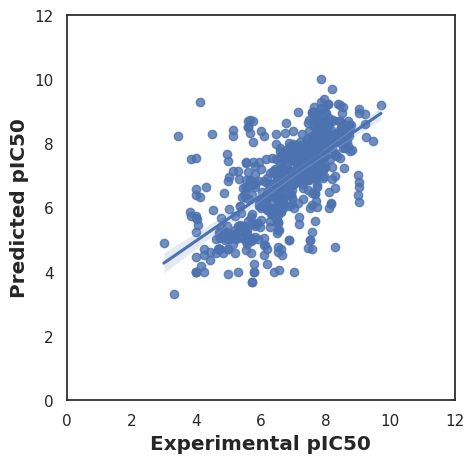

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y=Y_test, x=Y_pred)
scatter_kws={'alpha':0.4}
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show